Homework 2

In [1124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [1125]:
trainSize = 0.8
testSize = 0.2

Problem 1 (20 points)

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. At the end, plot the confusion matrix representing your binary classifier. 

In [1126]:
df = pd.read_csv('https://raw.githubusercontent.com/pcur/ECGR-4105/main/Homework%202/diabetes.csv')
M=len(df)

In [1127]:
#data formatting
X = df.values[:,[0,1,2,3,4,5,6,7]] #X1-8 from first 8 column
Y = df.values[:,8] # get output values from ninth column, outcome

x_train, x_test, y_train, y_test = tts(X, Y, train_size = trainSize, test_size = testSize)


m_train = len(y_train) # Number of training examples 
m_test = len(y_test)

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
x_test

array([[-1.15620707, -0.6011076 ,  0.34763443, ..., -4.04954781,
         0.28258114, -1.01452977],
       [-1.15620707, -0.44483693,  0.39789285, ...,  1.66920972,
         0.62426175, -0.76010311],
       [ 0.70138859, -0.22605799,  1.00099397, ..., -0.54002332,
        -0.69150834,  2.80187017],
       ...,
       [ 2.86858353, -1.41371508, -0.40624197, ...,  0.09118612,
        -0.89232063,  0.68164798],
       [-0.53700852, -0.69487   , -3.42174758, ..., -1.24697789,
        -1.10811892, -0.844912  ],
       [-0.8466078 ,  2.43054337,  0.39789285, ...,  1.36622919,
         2.74627821, -0.92972088]])

In [1128]:
#setting up classifier
classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [1129]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[95,  8],
       [17, 34]], dtype=int64)

In [1130]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.8376623376623377
Precision: 0.8095238095238095
Recall: 0.6666666666666666


Text(0.5, 257.44, 'Predicted Label')

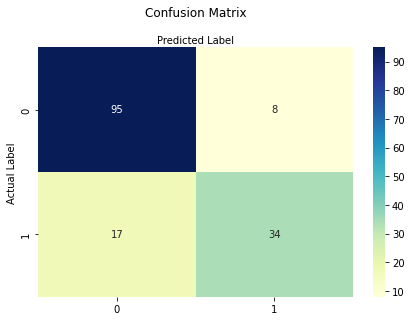

In [1131]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot =True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Problem 2 (20 points)

Repeat problem 1, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your average accuracy against problem 1.

In [1132]:
#Problem 2 - 1 with K-fold train/validate
K = [5,10]
i = 0
accp21 = [0,0]
for k in K:
    kfold = KFold(n_splits=k, random_state=0, shuffle=True)
    results = cross_val_score(classifier,X,Y, cv=kfold)
    accp21[i] = results.mean()*100.0
    print("Accuracy with K =", k, ": %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    i = i + 1

Accuracy with K = 5 : 76.425% (3.278%)
Accuracy with K = 10 : 76.818% (3.744%)


In [1146]:
print("Accuracy from P1: %.3f%%" % (float(metrics.accuracy_score(y_test,y_pred))*100.0))
print("Accuracy from P2: %.3f%%" % (np.mean(accp21)))


Accuracy from P1: 96.491%
Accuracy from P2: 76.621%


Problem 3 (30pts):
1. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. At the end, plot the confusion matrix representing your binary classifier. 

2. How about adding weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results.

In [1134]:
#Problem 3 - part 1
cancer_df = load_breast_cancer(as_frame = True)
X = cancer_df.data
Y = cancer_df.target
X.shape
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1135]:
x_train, x_test, y_train, y_test = tts(X, Y, train_size = 0.8, test_size = 0.2)
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [1136]:
classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

Accuracy: 0.9912280701754386
Precision: 0.9866666666666667
Recall: 1.0


Text(0.5, 257.44, 'Predicted Label')

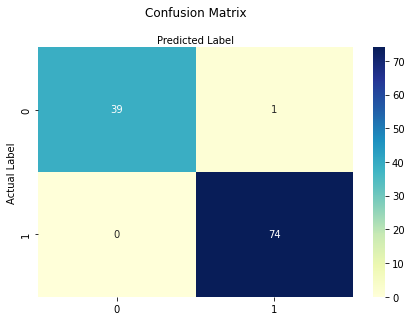

In [1137]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
acc31 = metrics.accuracy_score(y_test,y_pred)
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot =True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [1138]:
#part 2
classifier = LogisticRegression(solver='liblinear',penalty = 'l1')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.972972972972973


Text(0.5, 257.44, 'Predicted Label')

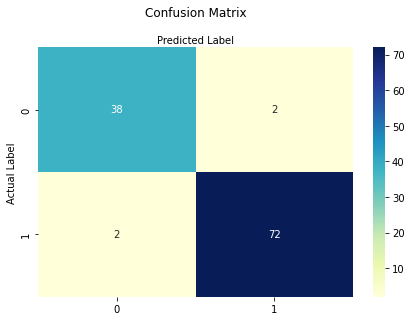

In [1139]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
acc32 = metrics.accuracy_score(y_test,y_pred)
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot =True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Problem 4 (30pts):

1. Repeat problem 3, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your average accuracy against problem 3. 

2. How about adding weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the average accuracy.

In [1140]:
#Problem 4 - part 1
classifier = LogisticRegression(solver='liblinear')

In [1141]:
K = [5,10]
i = 0
accp41 = [0,0]
for k in K:
    kfold = KFold(n_splits=k, random_state=0, shuffle=True)
    results = cross_val_score(classifier,X,Y, cv=kfold)
    accp41[i] = results.mean()*100.0
    print("Accuracy with K =", k, ": %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    i = i + 1

Accuracy with K = 5 : 95.434% (2.737%)
Accuracy with K = 10 : 95.254% (3.849%)


In [1142]:
print("Accuracy from P3-1: %.3f%%" % (float(acc31)*100.0))
print("Accuracy from P4-1: %.3f%%" % (np.mean(accp41)))

Accuracy from P3-1: 99.123%
Accuracy from P4-1: 95.344%


In [1143]:
#Problem 4 - part 2
cl = LogisticRegression(solver='liblinear',penalty = 'l1')

In [1144]:
K = [5,10]
i = 0
accp42 = [0,0]
for k in K:
    kfold = KFold(n_splits=k, random_state=0, shuffle=True)
    results = cross_val_score(classifier,X,Y, cv=kfold)
    accp42[i] = results.mean()*100.0
    print("Accuracy with K =", k, ": %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    i = i + 1

Accuracy with K = 5 : 95.434% (2.737%)
Accuracy with K = 10 : 95.254% (3.849%)


In [1145]:
print("Accuracy from P3-2: %.3f%%" % (float(acc32)*100.0))
print("Accuracy from P4-2: %.3f%%" % (np.mean(accp42)))

Accuracy from P3-2: 96.491%
Accuracy from P4-2: 95.344%
